<a href="https://colab.research.google.com/github/mansiraturi/FakeNewsDetection/blob/main/Copy_of_19BCE0488FakeNewsDetection_ColabCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re 
import string 

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df_fake=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv") 
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_fake["class"]=0
df_true["class"]=1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
#removing data row-wise
df_fake_manual_testing = df_fake.tail(10)
for i in range (23480, 23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range (21416, 21406, -1):
    df_true.drop([i], axis=0, inplace=True)    

In [8]:
#merging the two datasets
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("ManualTesting.csv")

In [9]:
df_merge=pd.concat([df_fake, df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [10]:
df=df_merge.drop(["title", "subject", "date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [11]:
#for shuffling the data
df=df.sample(frac=1)
df.head(10)

,text,class
15375,The Hillary Clinton supporters are the definit...,0
18394,"Meanwhile, back at CNN Russia Russia Russia!Th...",0
20546,MOSCOW (Reuters) - Russia s Defence Ministry o...,1
19484,Hillary Clinton on Thursday decried the spread...,0
7283,The so-called War on Drugs has has taken ano...,0
8679,CLEVELAND (Reuters) - Ted Cruz was recounting ...,1
5832,GOP Tennessee State Rep. Andy Holt is done wit...,0
1046,WASHINGTON (Reuters) - The U.S. Justice Depart...,1
20154,LUANDA (Reuters) - Angola s Constitutional Cou...,1
11496,BARCELONA/MADRID (Reuters) - Separatists looke...,1


In [12]:
#to eliminate null data
df.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
#to remove special characters
def word_drop(text):
    text=text.lower()
    text=re.sub( '\[.*?\]', '', text)
    text=re.sub("\\W", " ", text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    return text

In [14]:
df["text"]=df["text"].apply(word_drop)

In [15]:
df.head(10)

,text,class
15375,the hillary clinton supporters are the definit...,0
18394,meanwhile back at cnn russia russia russia th...,0
20546,moscow reuters russia s defence ministry o...,1
19484,hillary clinton on thursday decried the spread...,0
7283,the so called war on drugs has has taken ano...,0
8679,cleveland reuters ted cruz was recounting ...,1
5832,gop tennessee state rep andy holt is done wit...,0
1046,washington reuters the u s justice depart...,1
20154,luanda reuters angola s constitutional cou...,1
11496,barcelona madrid reuters separatists looke...,1


In [16]:
#stemming: reducing a word to its root word
port_stem = PorterStemmer()
def stemming(text):
    content = re.sub('[^a-zA-Z]',' ',text)
    content = content.lower()
    content = content.split()
    #content = [port_stem.stem(word) for word in content if not word in stopwords.words('english')]
    content = ' '.join(content)
    return content

In [17]:
df['text'] = df['text'].apply(stemming)

In [18]:
print(df['text'])

15375    the hillary clinton supporters are the definit...
18394    meanwhile back at cnn russia russia russia the...
20546    moscow reuters russia s defence ministry on sa...
19484    hillary clinton on thursday decried the spread...
7283     the so called war on drugs has has taken anoth...
                               ...                        
10731    new york san juan reuters puerto rico s much d...
2218     washington reuters u s president donald trump ...
18245    sarah huckabee sanders has taken control of th...
10675    read former fbi director james comey s full st...
8382     donald trump has been gallivanting across amer...
Name: text, Length: 44878, dtype: object


In [19]:
x=df["text"]
y=df["class"]

In [20]:
x=df["text"]
y=df["class"]

In [21]:
#separating the data and label
Xmat=df.drop(columns='class', axis=1)
Ymat=df['class']

In [22]:
print(Xmat)
print(Ymat)

                                                    text
15375  the hillary clinton supporters are the definit...
18394  meanwhile back at cnn russia russia russia the...
20546  moscow reuters russia s defence ministry on sa...
19484  hillary clinton on thursday decried the spread...
7283   the so called war on drugs has has taken anoth...
...                                                  ...
10731  new york san juan reuters puerto rico s much d...
2218   washington reuters u s president donald trump ...
18245  sarah huckabee sanders has taken control of th...
10675  read former fbi director james comey s full st...
8382   donald trump has been gallivanting across amer...

[44878 rows x 1 columns]
15375    0
18394    0
20546    1
19484    0
7283     0
        ..
10731    1
2218     1
18245    0
10675    0
8382     0
Name: class, Length: 44878, dtype: int64


In [23]:
#splitting dataset into train and test set 
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, stratify=y)

In [24]:
#vectorizing x as raw data can't be used directly to perform calculations so we convert textual data to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
#Tfidf- term frequency/inverse document frequency: counts the frequency of a word in a file
xv_train=vectorization.fit_transform(x_train)  #converting text to feature vector
xv_test=vectorization.transform(x_test)


In [25]:
#NAVE BAYE'S
from sklearn.naive_bayes import MultinomialNB


In [26]:
MB=MultinomialNB()
MB.fit(xv_train, y_train)

MultinomialNB()

In [27]:
pred_MB = MB.predict(xv_test)

In [28]:
MB_acc=MB.score(xv_test, y_test)

In [29]:
print(classification_report(y_test, pred_MB))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5868
           1       0.94      0.93      0.93      5352

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test, pred_MB)
print(cm)
as1=accuracy_score(y_test, pred_MB)
ps1=precision_score(y_test, pred_MB)
r1=recall_score(y_test, pred_MB)
f11=f1_score(y_test, pred_MB)
print("Accuracy Score :",accuracy_score(y_test, pred_MB))
print("Precision Score :",precision_score(y_test, pred_MB))
print("Recall Score :",recall_score(y_test, pred_MB))
print("f1 Score :",f1_score(y_test, pred_MB))


[[5561  307]
 [ 392 4960]]
Accuracy Score : 0.9377005347593583
Precision Score : 0.9417125498386179
Recall Score : 0.9267563527653214
f1 Score : 0.9341745927111782


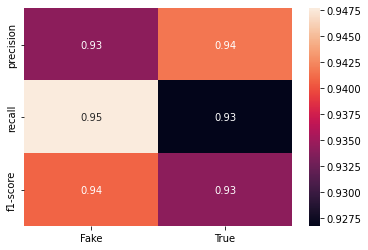

In [31]:
#Heat Map
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, pred_MB, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)



In [32]:
###Training the model
##Logistic Regression 
##As it is binary classification- data divided into fake or true
from sklearn.linear_model import LogisticRegression

In [33]:
#Y=1/(1+e^(-z)) ; if prediction is greater than the threshold value-> classified as 1 or true news
#Z=w.x+b
#Y=prediction probability(determines whether label will be 0 or 1), x=input features
#w=weights (how important a feature is), b=biases(intercept)
LR=LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [34]:
pred_LR = LR.predict(xv_test)  #making prediction on this vector data

In [35]:
LR_acc=LR.score(xv_test, y_test) #accuracy score of the test data

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test, pred_LR)
print(cm)
as2=accuracy_score(y_test, pred_LR)
ps2=precision_score(y_test, pred_LR)
r2=recall_score(y_test, pred_LR)
f12=f1_score(y_test, pred_LR)
print("Accuracy Score :",accuracy_score(y_test, pred_LR))
print("Precision Score :",precision_score(y_test, pred_LR))
print("Recall Score :",recall_score(y_test, pred_LR))
print("f1 Score :",f1_score(y_test, pred_LR))


[[5786   82]
 [  65 5287]]
Accuracy Score : 0.9868983957219252
Precision Score : 0.9847271372695101
Recall Score : 0.9878550074738416
f1 Score : 0.9862885924820446


In [37]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.98      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



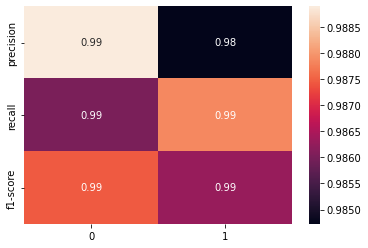

In [38]:
#Heat Map
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, pred_LR, target_names=['0', '1'], output_dict=True)
cleaned_report={}
cleaned_report['0']=clf_report['0']
cleaned_report['1']=clf_report['1']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)



In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
DT_acc=DT.score(xv_test, y_test)

In [42]:
pred_DT =  DT.predict(xv_test)

In [43]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5868
           1       1.00      0.99      0.99      5352

    accuracy                           1.00     11220
   macro avg       1.00      0.99      0.99     11220
weighted avg       1.00      1.00      1.00     11220



In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test, pred_DT)
print(cm)
as3=accuracy_score(y_test, pred_DT)
ps3=precision_score(y_test, pred_DT)
r3=recall_score(y_test, pred_DT)
f13=f1_score(y_test, pred_DT)
print("Accuracy Score :",accuracy_score(y_test, pred_DT))
print("Precision Score :",precision_score(y_test, pred_DT))
print("Recall Score :",recall_score(y_test, pred_DT))
print("f1 Score :",f1_score(y_test, pred_DT))


[[5849   19]
 [  37 5315]]
Accuracy Score : 0.9950089126559715
Precision Score : 0.9964379452568429
Recall Score : 0.9930866965620329
f1 Score : 0.9947594984091336


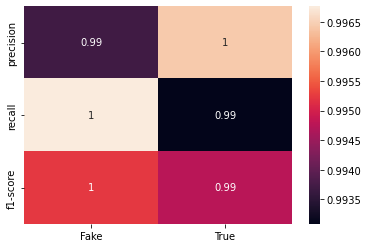

In [45]:
#Heat Map
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, pred_DT, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)



In [46]:
#COMPARISON
comp_graph_data=[['Nave Bayes',as1,ps1,r1,f11],['Logistic Regressioon',as2,ps2,r2,f12], ['Decision Tree',as3,ps3,r3,f13]]
df=pd.DataFrame(comp_graph_data, columns=['Algorithm', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
df.set_index('Algorithm', inplace=True)
df

,Accuracy Score,Precision Score,Recall Score,F1 Score
Algorithm,,,,
Nave Bayes,0.937701,0.941713,0.926756,0.934175
Logistic Regressioon,0.986898,0.984727,0.987855,0.986289
Decision Tree,0.995009,0.996438,0.993087,0.994759


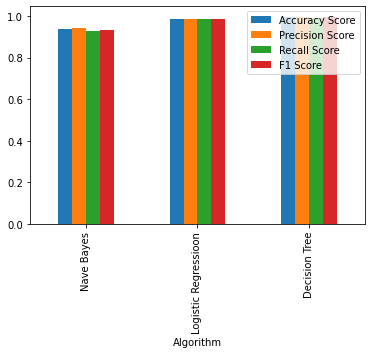

In [47]:
import matplotlib.pyplot as plt
df.plot.bar()
plt.show()

In [48]:
#MANUAL TESTING
#prediction model
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    #new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_MB = MB.predict(new_xv_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print(" \nNB Prediction: {} \nLR Prediction: {} \nDT  Prediction: {}".format(output_lable(pred_MB[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0])))

In [50]:
news = str(input())
manual_testing(news)

U.S. military to accept transgender recruits on Monday: Pentagon
 
NB Prediction: Not Fake News 
LR Prediction: Fake News 
DT  Prediction: Not Fake News
